In [9]:
# Monte Carlo Sampling 

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
# (xi,yi) are the points. Choose those points that satisfy yi< f(xi)
# f(xi) being the function we want to approximate

100 78 3.12 0.02159265358979301
200 157 3.14 0.0015926535897929917
400 319 3.19 0.04840734641020683
800 626 3.13 0.011592653589793223
1600 1305 3.2625 0.12090734641020706
3200 2494 3.1175 0.024092653589792956
6400 5016 3.135 0.006592653589793329
12800 10033 3.1353125 0.006280153589793169
25600 20086 3.1384375 0.003155153589792903
51200 40167 3.138046875 0.0035457785897929917


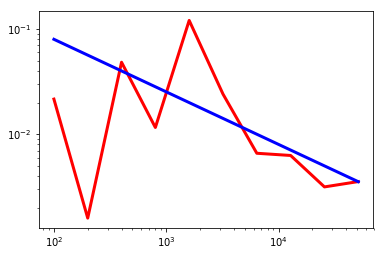

In [3]:
# Hit and miss Monte Carlo integration
ngroups = 10

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);

pyplot.xscale('log')
pyplot.yscale('log')

In [6]:
# Weight f(x) by a probabilitic distribution  for importance sampling 

Trapezoids:  1.3293401896452883
Simple Monte Carlo:  0.20061667992738524
Importance Sampling:  1.3275016184211332


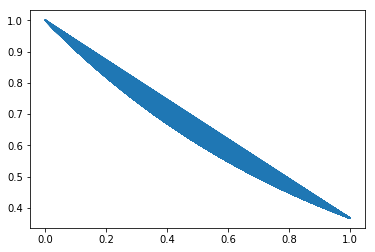

In [4]:
## Importance Sampling 
pyplot.plot(x,np.exp(-x));

# Trapezoidal integration
def trapezoids(func, xmin, xmax, nmax):
    Isim = func(xmin)+func(xmax)
    h = (xmax-xmin)/nmax
    for i in range(1,nmax):
        x = xmin+i*h
        Isim += 2*func(x)

    Isim *= h/2
    return Isim

def f(x):
    return x**1.5*np.exp(-x)
    
    
print("Trapezoids: ", trapezoids(f, 0., 20., 100000))

# Simple Monte Carlo integration
n0 = 1000000
r = np.random.random(n0)

Itot = np.sum(r**1.5*np.exp(-r))
print("Simple Monte Carlo: ", Itot/n0)

x = -np.log(r)
Itot = np.sum(x**1.5)
print("Importance Sampling: ", Itot/n0)